In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.shape

(10683, 11)

In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
# EDA (Exploratory Data Analysis)
# Converting Date_of_journey into integers

data['Journey_day']= pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [9]:
data['Journey_Month']= pd.to_datetime(data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Dropping unuseful columns
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [12]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# Extracting the values as integers

data['Dep_hrs']= pd.to_datetime(data['Dep_Time']).dt.hour

In [14]:
data['Dep_min']= pd.to_datetime(data['Dep_Time']).dt.minute

In [15]:
data.drop(['Dep_Time'],axis=1, inplace = True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
data['Arrival_min']= pd.to_datetime(data['Arrival_Time']).dt.minute
data['Arrival_hrs']= pd.to_datetime(data['Arrival_Time']).dt.hour
data.drop(['Arrival_Time'], axis=1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,35,21


In [18]:
# Assigning and converting Duration column into list

duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+" "+'0m'
        else:
            duration[i]= duration[i]+' '+ '0h'

In [19]:
data['Duration']= duration

In [20]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [21]:
data['Duration_hrs']= data['Duration'].apply(hour)
data['Duration_min']= data['Duration'].apply(minute)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,35,21,4,45


In [22]:
data.drop(['Duration'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,35,21,4,45


In [23]:
# Handling Categorical data

data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

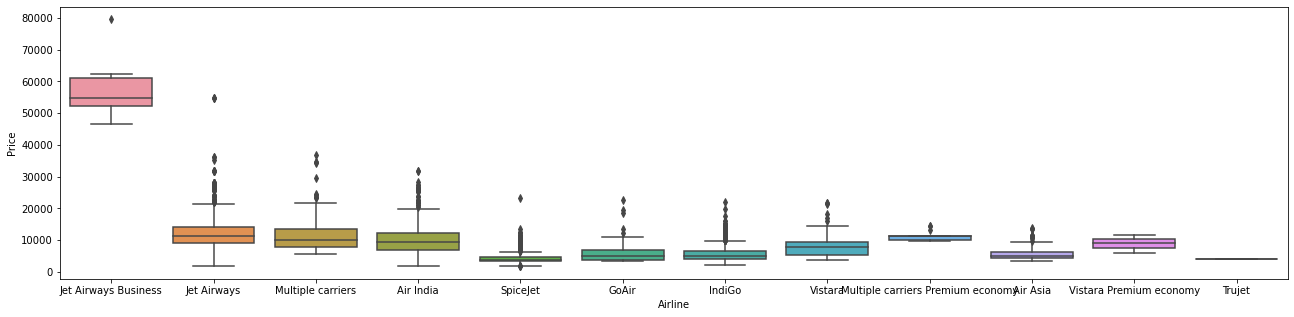

In [25]:
# Airline vs Price

plt.figure(figsize=(22,5))
sns.boxplot(x='Airline', y='Price', data = data.sort_values('Price', ascending = False))

In [26]:
# Encodinhg the data by using OneHotEnoding

Airline = data['Airline']
Airline = pd.get_dummies(Airline, drop_first = True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [27]:
# Source vs Price

data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

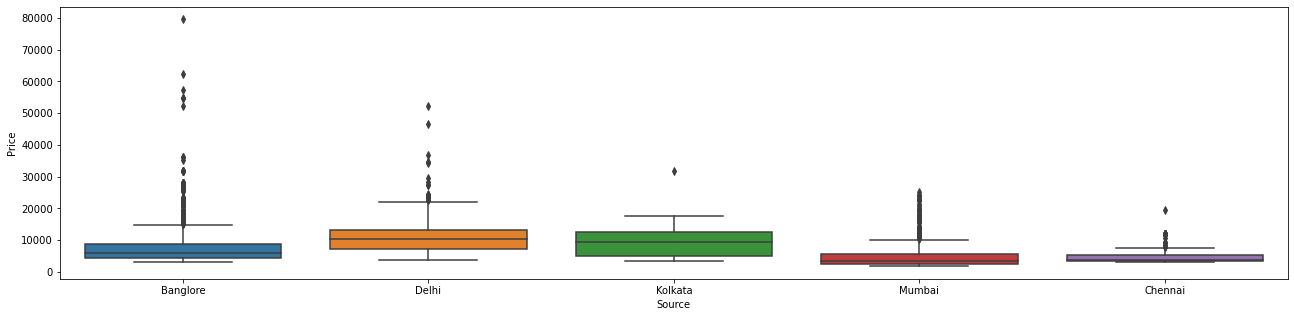

In [28]:
plt.figure(figsize=(22,5))
sns.boxplot(x='Source', y='Price', data = data.sort_values('Price', ascending = False))

In [29]:
# Encodinhg the data by using OneHotEnoding

Source = data['Source']
Source = pd.get_dummies(Source, drop_first= True )
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [30]:
# Encodinhg the data by using OneHotEnoding

data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

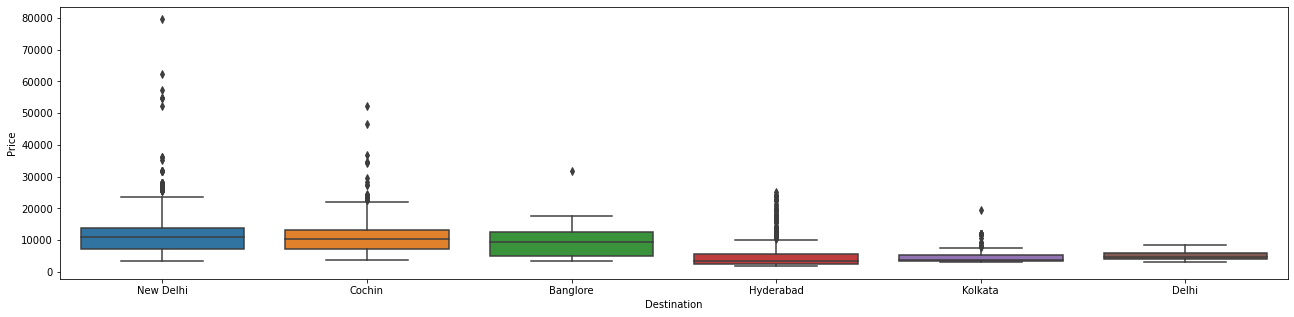

In [31]:
plt.figure(figsize=(22,5))
sns.boxplot(x='Destination', y='Price', data = data.sort_values('Price', ascending = False))

In [32]:
Destination = data['Destination']
Destination = pd.get_dummies(Destination, drop_first= True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [33]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4 }, inplace = True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,35,21,4,45


In [37]:
# Route and Total_Stops are related to each other

data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,10,1,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,15,13,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,30,23,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,25,22,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,20,23,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,20,11,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,10,14,2,40


In [38]:
# Concatenate dataframe

data = pd.concat([data,Airline,Source,Destination], axis = 1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,35,...,0,0,0,0,0,0,0,0,0,1


In [39]:
data.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [40]:
data

,Total_Stops,Price,Journey_day,Journey_Month,Dep_hrs,Dep_min,Arrival_min,Arrival_hrs,Duration_hrs,Duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,10,1,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,15,13,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,25,4,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,30,23,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,35,21,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,25,22,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,20,23,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,20,11,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,10,14,2,40,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Price'>

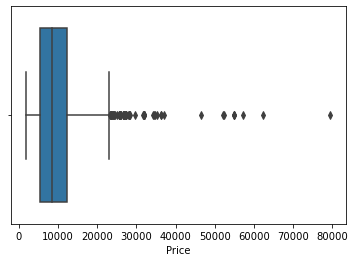

In [41]:
sns.boxplot(x=data['Price'])

In [42]:
data['Price'] = np.where(data['Price']>40000, data['Price'].median(),data['Price'])

In [43]:
x = data.drop('Price', axis =1)
y = data['Price']

In [44]:
# Selecting Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [45]:
print(selection.feature_importances_)

[2.38407381e-01 1.53067750e-01 5.96060945e-02 2.34791990e-02
 2.25836001e-02 1.96910605e-02 2.21391775e-02 1.41657481e-01
 1.71863630e-02 1.72083619e-02 1.78704348e-03 1.29250500e-02
 1.52690677e-01 2.59990361e-04 2.39074841e-02 1.05567646e-03
 2.94221717e-03 8.60910476e-05 6.59446844e-03 9.98127137e-05
 6.35546089e-04 1.36215518e-02 3.86062706e-03 7.19786257e-03
 9.10959896e-03 1.57603132e-02 7.88286914e-03 6.52733888e-04
 2.39039186e-02]


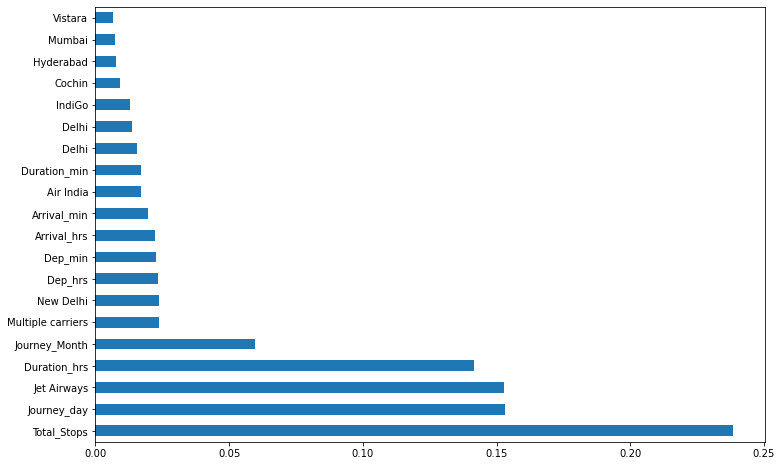

In [46]:
plt.figure(figsize = (12, 8))
fet_importances = pd.Series(selection.feature_importances_, index =x.columns)
fet_importances.nlargest(20).plot(kind = 'barh')
plt.show()

In [47]:
# Model fitting using RandomForest 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 325)

In [48]:
from sklearn.ensemble import RandomForestRegressor
reg_ref = RandomForestRegressor()
reg_ref.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
y_pred = reg_ref.predict(x_test)

In [50]:
reg_ref.score(x_train, y_train)

0.952984668273757

In [51]:
reg_ref.score(x_test, y_test)

0.8152486910422954

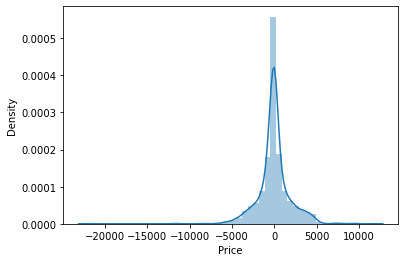

In [52]:
sns.distplot(y_test - y_pred)
plt.show()

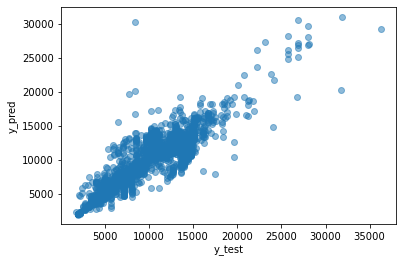

In [53]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [54]:
from sklearn import metrics

In [55]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE : 1197.3264256085256
MSE : 3669695.55280036
RMSE : 34.60240491076488


In [56]:
metrics.r2_score(y_test, y_pred)

0.8152486910422954

In [57]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

In [58]:
#Randomized Search CV


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
rf_random = RandomizedSearchCV(estimator = reg_ref, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [63]:
prediction = rf_random.predict(x_test)

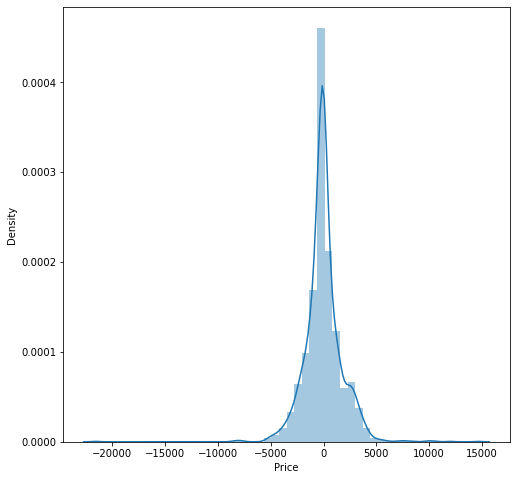

In [64]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

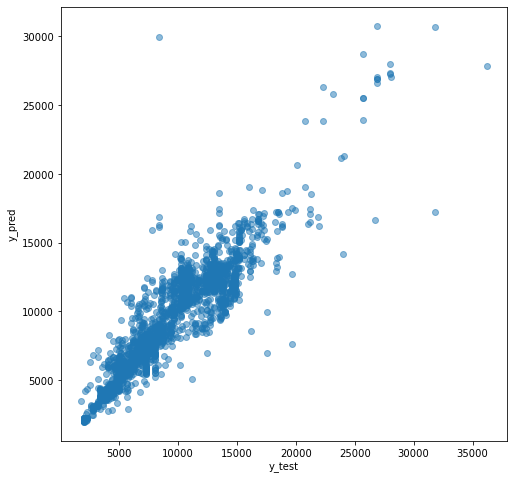

In [65]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.6107740164498
MSE: 3213056.852502142
RMSE: 1792.5001680619564
